In [2]:
from neural_implementation import neural_classification as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
# UCITAVANJE PODATAKA I TESTIRANJE

df = pd.read_csv('../datasets/iris_extended.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
N = df.shape[0]
print(f'Ukupan broj podataka: {N}')

m = df.shape[1] - 1
print(f'Broj atributa svakog podatka: {m}')

attributes = list(df.drop('variety', axis=True).columns)
print(f'Atributi: {attributes}')

Ukupan broj podataka: 250
Broj atributa svakog podatka: 4
Atributi: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [8]:
attr1 = 'petal.length'
attr2 = 'petal.width'
attributes = [attr1, attr2]
m = len(attributes)

In [9]:
N = df.shape[0]
print(f'Velicina skupa podataka: {N}')

X = np.ones((N, m + 1))
X[:, 1] = df[attr1]
X[:, 2] = df[attr2]

y_tmp = df['variety']

Velicina skupa podataka: 250


In [ ]:
classes = df['variety'].unique()
n_classes = len(classes)

print(f'Klase: {classes}')
print(f'Broj klasa: {n_classes}\n')

name_to_class_dict = dict(zip(classes, range(n_classes)))
class_to_name_dict = dict(zip(range(n_classes), classes))

print(f'Mapiranje imena klasa u numericke vrednosti:')
for name, cls in name_to_class_dict.items():
    print(f'{name} -> {cls}')

print()
print(f'Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:')
for cls, name in class_to_name_dict.items():
    print(f'{cls} -> {name}')

Klase: ['Setosa' 'Versicolor' 'Virginica' 'Letosa' 'Helenica']
Broj klasa: 5

Mapiranje imena klasa u numericke vrednosti:
Setosa -> 0
Versicolor -> 1
Virginica -> 2
Letosa -> 3
Helenica -> 4

Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:
0 -> Setosa
1 -> Versicolor
2 -> Virginica
3 -> Letosa
4 -> Helenica


In [11]:
mapper_cls_to_vec = {}
for i in range(n_classes):
    vec = np.zeros((n_classes,))
    vec[i] = 1
    
    mapper_cls_to_vec[i] = vec
    
print('Mapiranje numericke vrednosti u odgovarajuci vektor:')
for cls, vec in mapper_cls_to_vec.items():
    print(f'{cls} -> {vec}')

Mapiranje numericke vrednosti u odgovarajuci vektor:
0 -> [1. 0. 0. 0. 0.]
1 -> [0. 1. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0.]
3 -> [0. 0. 0. 1. 0.]
4 -> [0. 0. 0. 0. 1.]


In [12]:
y = np.zeros((N, n_classes))
for i in range(N):
    cls = name_to_class_dict[y_tmp[i]]
    y[i] = mapper_cls_to_vec[cls]

In [13]:
print(f'Podaci:')
print(X[:10])
print(' ...')

print(f'Ciljne promenljive:')
print(y[:10])
print(' ...')

Podaci:
[[1.  1.4 0.2]
 [1.  1.4 0.2]
 [1.  1.3 0.2]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.7 0.4]
 [1.  1.4 0.3]
 [1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.5 0.1]]
 ...
Ciljne promenljive:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
 ...


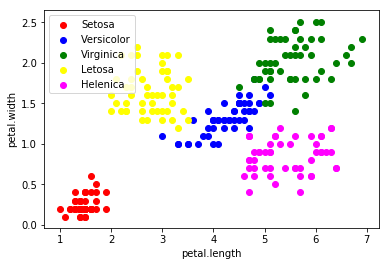

In [14]:
colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [16]:
print(f'X_train:')
print(X_train)
print()

print(f'y_train:')
print(y_train)
print()

print(f'X_test:')
print(X_test)
print()

print(f'y_test:')
print(y_test)

X_train:
[[1.  2.6 1.8]
 [1.  1.2 0.2]
 [1.  2.6 1.4]
 [1.  2.7 1.7]
 [1.  4.8 0.6]
 [1.  2.3 1.7]
 [1.  1.3 0.3]
 [1.  4.1 1.3]
 [1.  6.1 1.9]
 [1.  4.3 1.3]
 [1.  4.7 1.4]
 [1.  4.3 1.3]
 [1.  2.  1.4]
 [1.  6.  1.8]
 [1.  5.6 1.8]
 [1.  4.4 1.3]
 [1.  5.  2. ]
 [1.  4.8 0.7]
 [1.  1.7 0.4]
 [1.  1.5 0.2]
 [1.  6.1 2.3]
 [1.  6.4 0.7]
 [1.  6.6 2.1]
 [1.  3.3 2.1]
 [1.  5.9 2.3]
 [1.  5.7 2.3]
 [1.  3.1 2.1]
 [1.  6.1 2.5]
 [1.  1.6 0.2]
 [1.  5.9 2.1]
 [1.  4.2 1.5]
 [1.  4.6 0.6]
 [1.  1.5 0.3]
 [1.  5.1 1.9]
 [1.  3.9 1.2]
 [1.  6.2 0.9]
 [1.  4.9 1.8]
 [1.  4.7 0.8]
 [1.  5.6 2.4]
 [1.  4.8 0.8]
 [1.  5.2 0.5]
 [1.  5.6 0.7]
 [1.  4.5 1.5]
 [1.  6.  1. ]
 [1.  4.8 0.9]
 [1.  2.6 1.5]
 [1.  2.7 1.3]
 [1.  4.9 1.5]
 [1.  4.7 1.1]
 [1.  5.1 1.8]
 [1.  6.7 2.2]
 [1.  2.8 1.6]
 [1.  6.  2.5]
 [1.  6.4 0.7]
 [1.  3.2 1.3]
 [1.  1.4 0.2]
 [1.  5.9 0.6]
 [1.  1.3 0.2]
 [1.  4.5 1.5]
 [1.  4.6 1.5]
 [1.  2.1 1.8]
 [1.  1.5 0.4]
 [1.  5.3 2.3]
 [1.  3.2 1.5]
 [1.  5.1 2.4]
 [1.  1.4 0.3]
 

In [17]:
X_train_first = X_train[0].reshape(1, -1)
y_train_first = y_train[0].reshape(1, -1)

In [21]:
neural_networks = [
    nc.NeuralNetwork(m, [m], n_classes),
    nc.NeuralNetwork(m, [m, m], n_classes),
    nc.NeuralNetwork(m, [m, m, m], n_classes),
    nc.NeuralNetwork(m, [2*m], n_classes),
    nc.NeuralNetwork(m, [2*m, m], n_classes),
    nc.NeuralNetwork(m, [2*m, 2*m], n_classes),
    nc.NeuralNetwork(m, [3*m], n_classes),
    nc.NeuralNetwork(m, [3*m, m], n_classes),
    nc.NeuralNetwork(m, [3*m, 3*m], n_classes)
]

In [23]:
print('~ ALL NEURAL NETWORKS ~\n')
for i, nn in enumerate(neural_networks):
    print(f'Neural network v{i+1}:')
    nn.print_network()
    print()

~ ALL NEURAL NETWORKS ~

Neural network v1:
~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1.]

Neural network v2:
~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1.]
Layer 3:
[1. 1. 1.]
Layer 4:
[1. 1. 1. 1. 1.]

Neural network v3:
~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1.]
Layer 3:
[1. 1. 1.]
Layer 4:
[1. 1. 1.]
Layer 5:
[1. 1. 1. 1. 1.]

Neural network v4:
~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1.]

Neural network v5:
~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1.]
Layer 4:
[1. 1. 1. 1. 1.]

Neural network v6:
~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1.]
Layer 4:
[1. 1. 1. 1. 1.]

Neural network v7:
~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1.]

Neural network v8:
~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1. 1. 1.]
Layer 3:
[1. 1

In [24]:
lambdas = [0] + [0.01 * (1.5**i) for i in range(7)]
print('lamda parameters:')
print(lambdas)

lamda parameters:
[0, 0.01, 0.015, 0.0225, 0.03375, 0.050625, 0.0759375, 0.11390625]


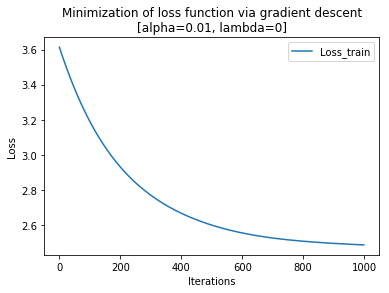

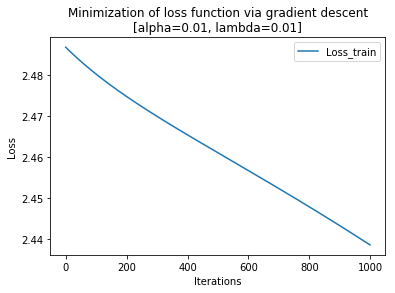

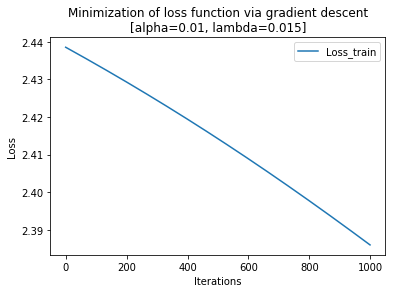

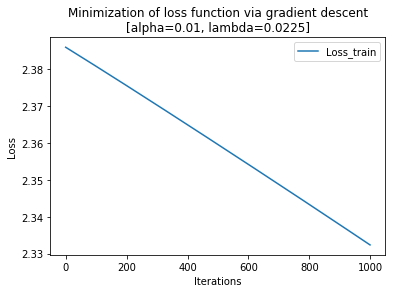

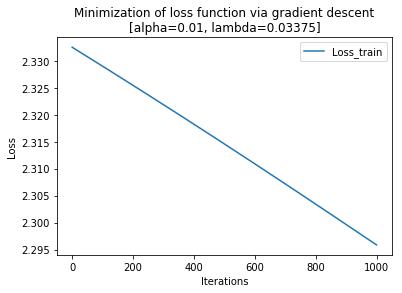

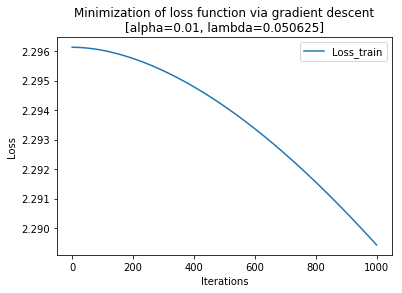

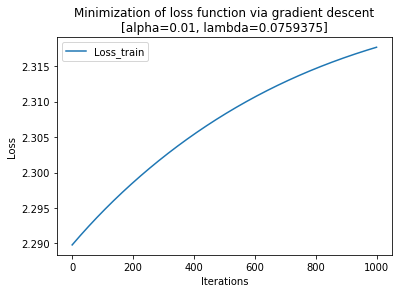

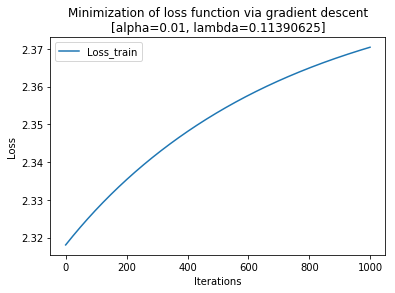

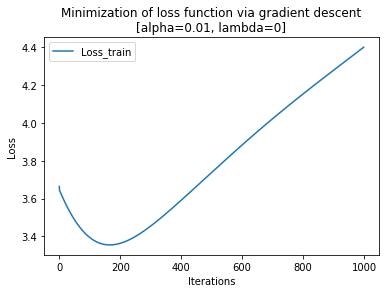

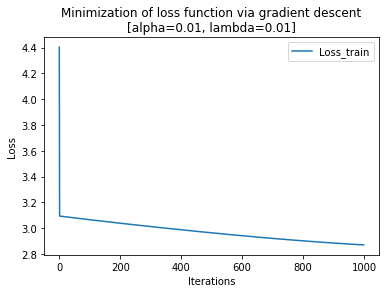

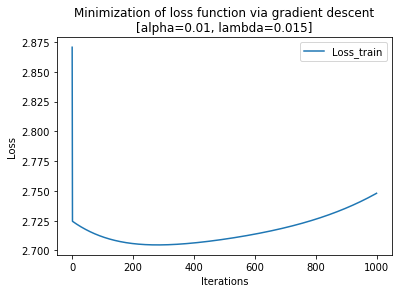

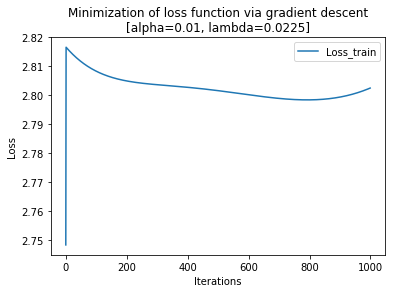

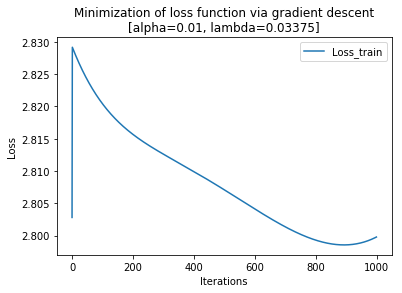

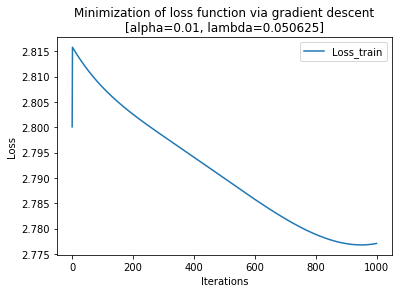

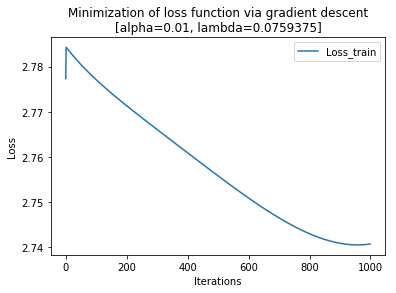

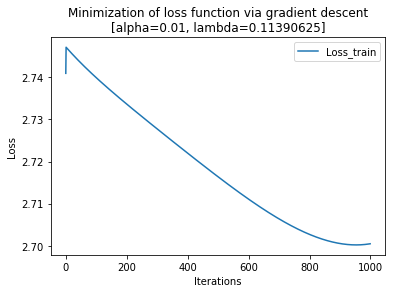

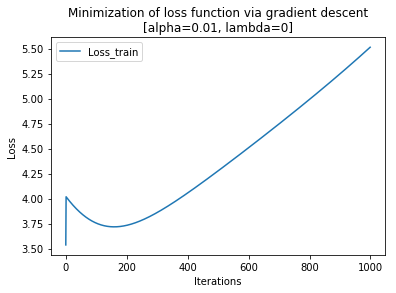

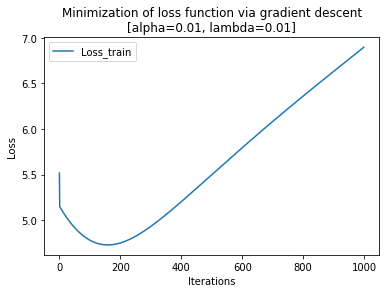

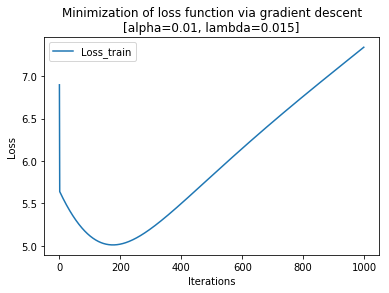

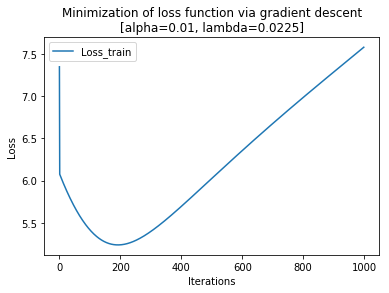

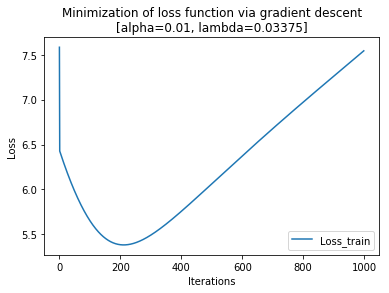

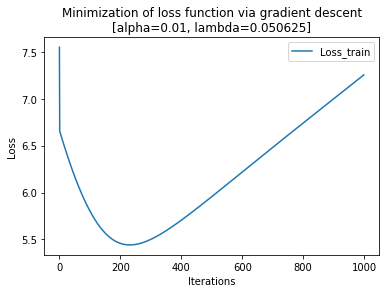

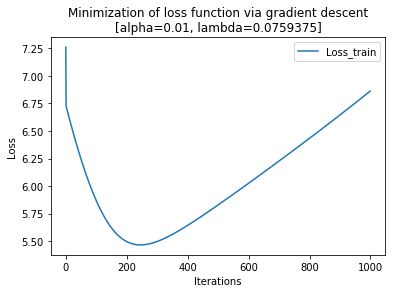

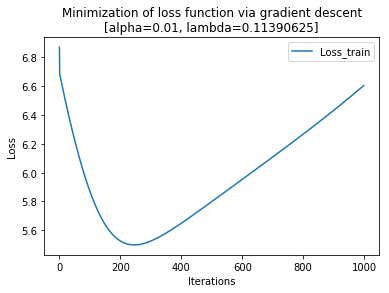

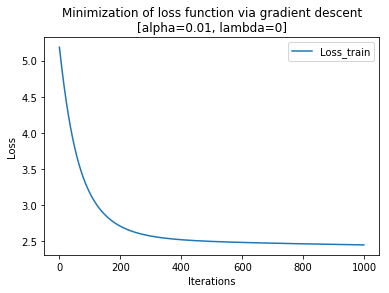

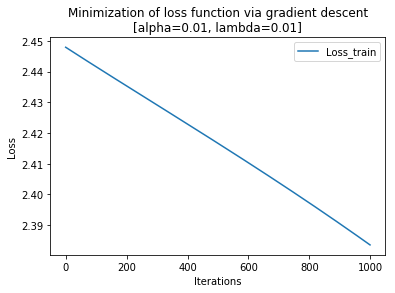

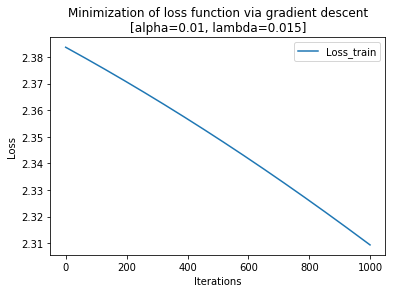

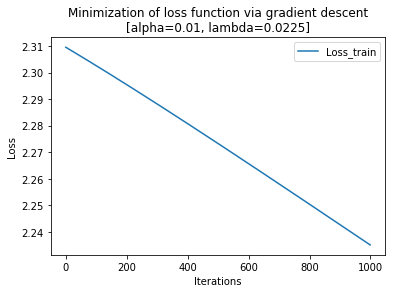

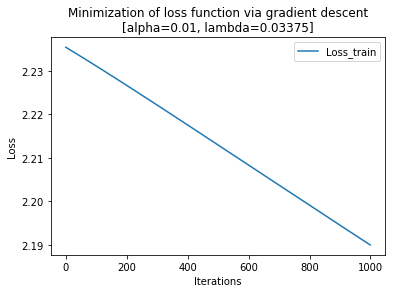

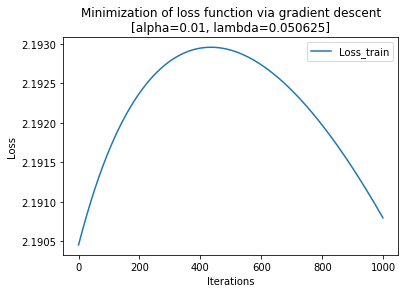

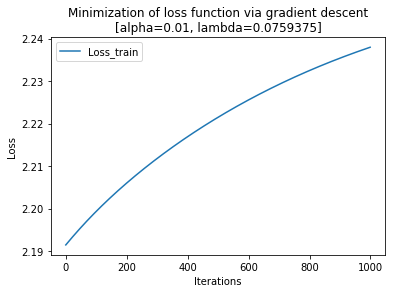

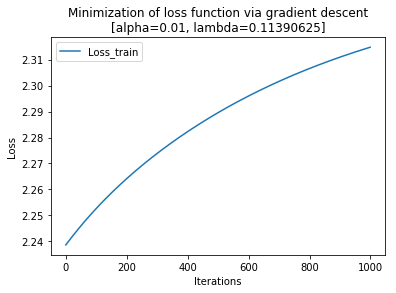

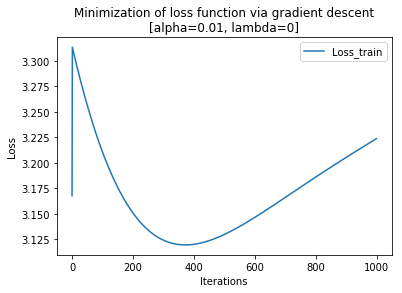

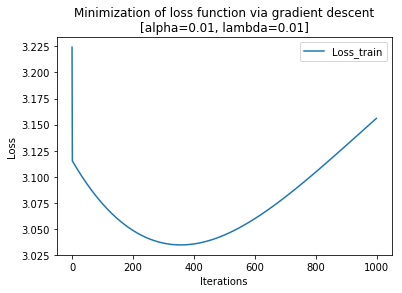

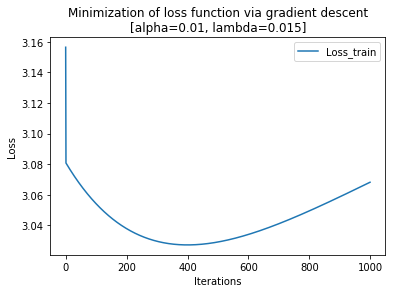

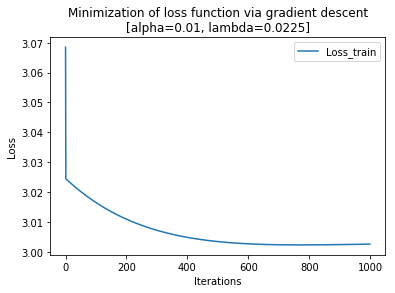

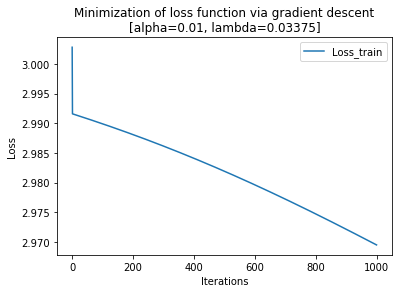

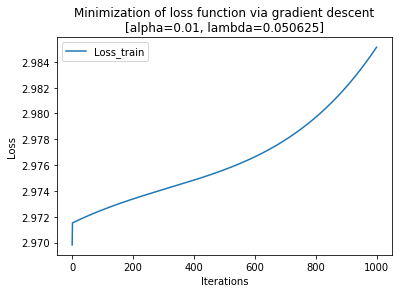

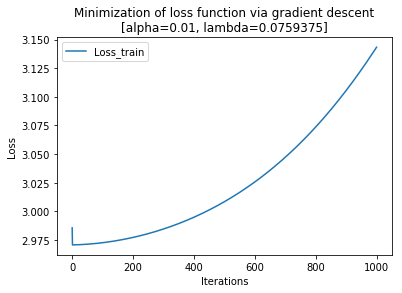

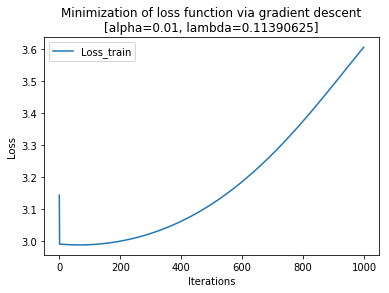

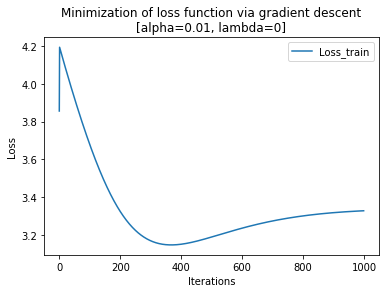

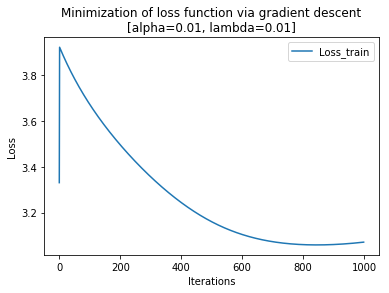

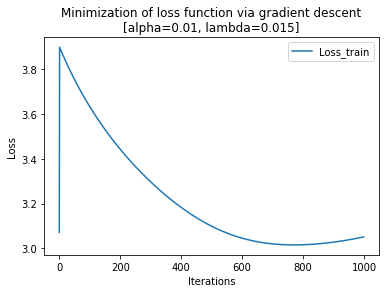

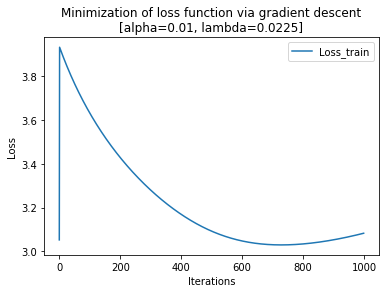

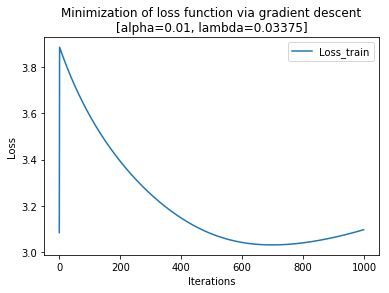

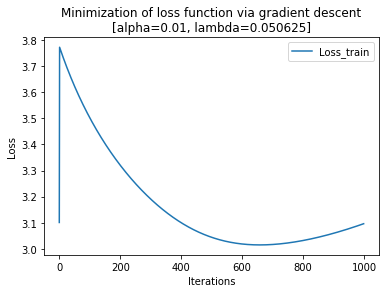

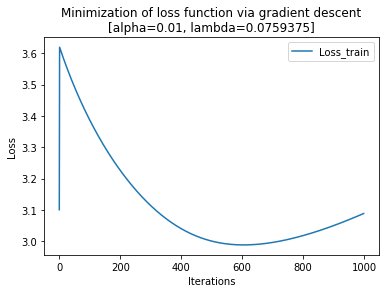

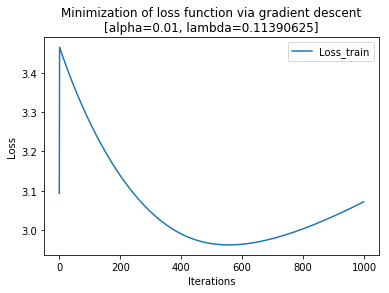

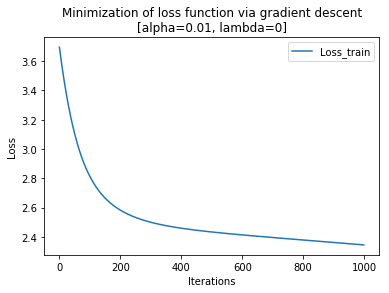

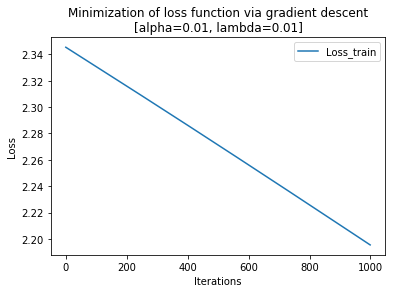

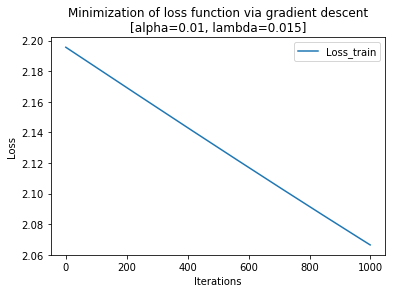

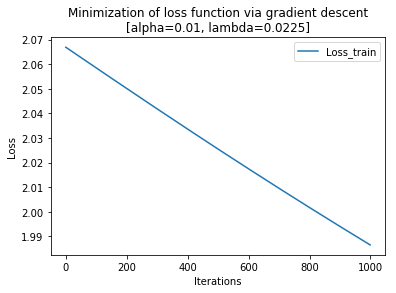

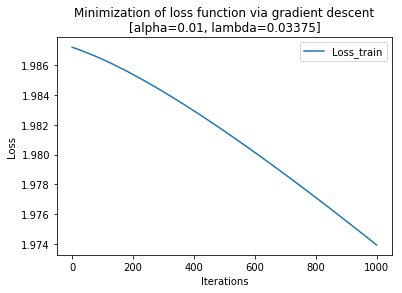

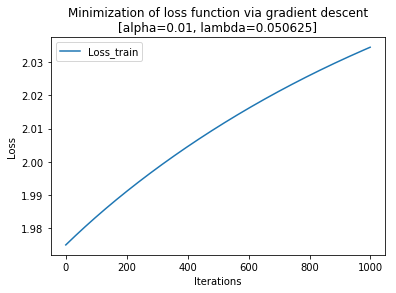

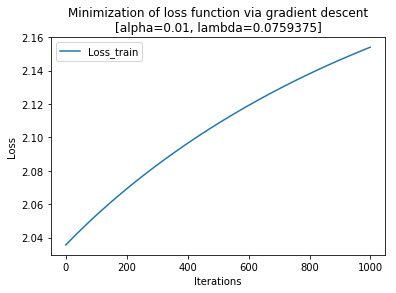

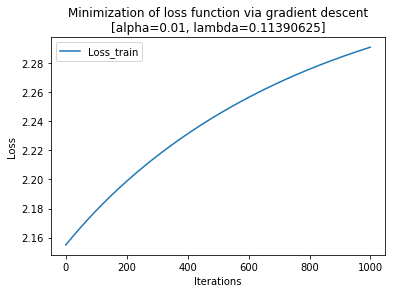

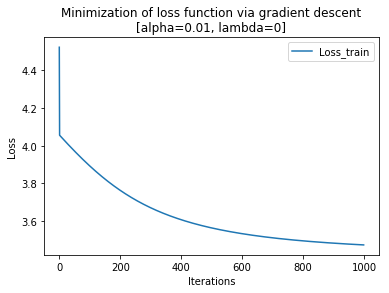

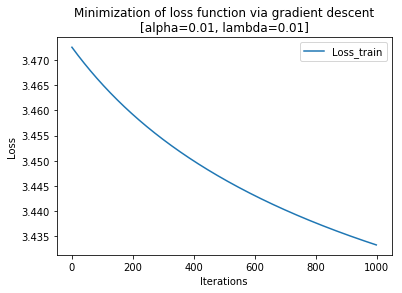

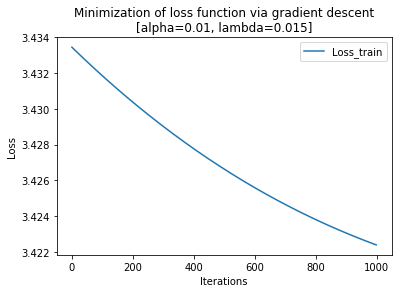

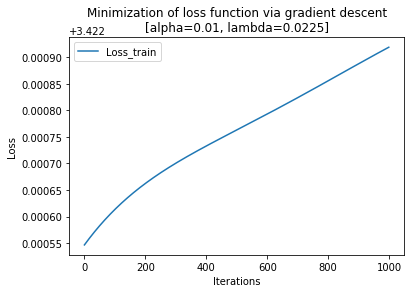

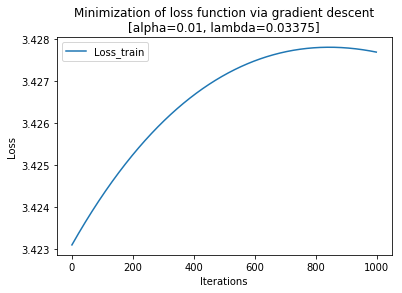

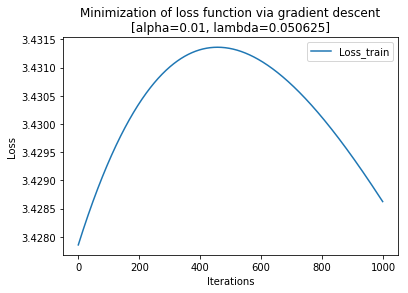

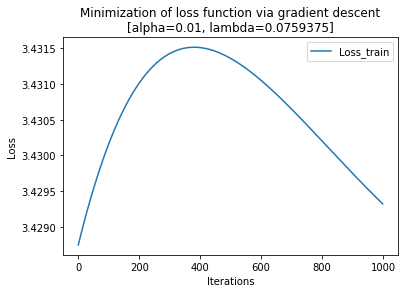

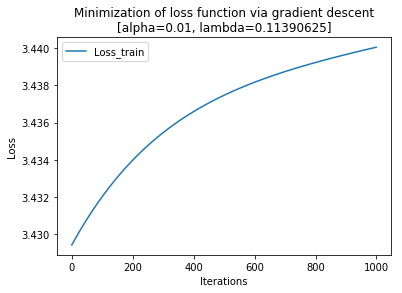

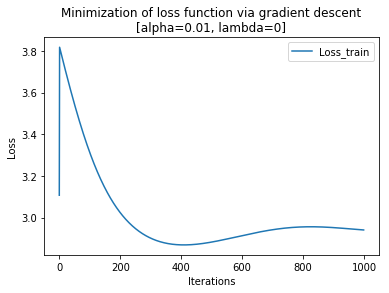

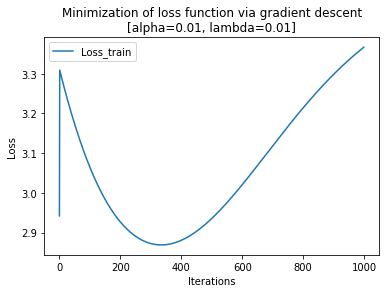

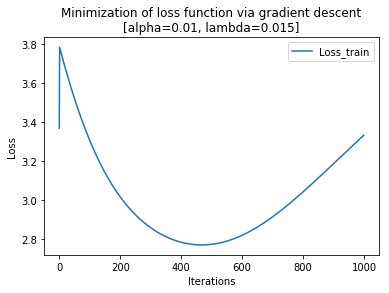

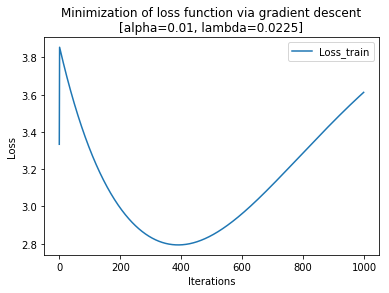

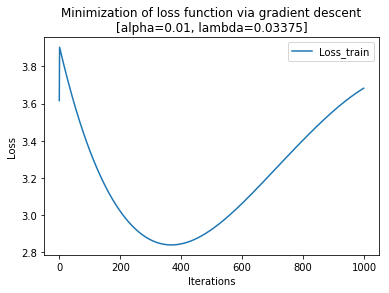

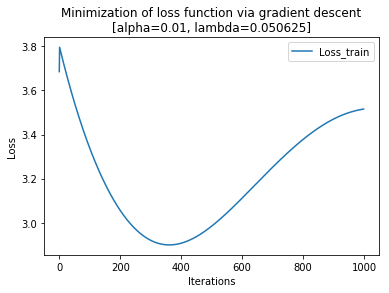

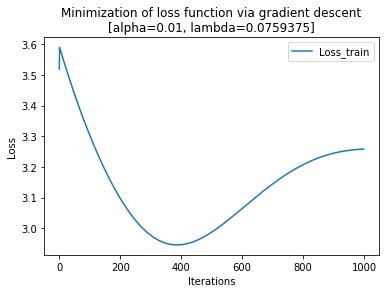

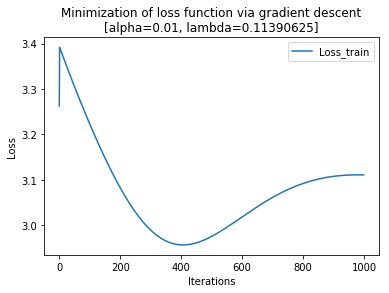

In [25]:
classifiers = []
for nn in neural_networks:
    for lambda_param in lambdas:
        classifiers.append(nn.fit(X_train, 
                                  y_train, 
                                  alpha=0.01, 
                                  lambda_param=lambda_param,
                                  plot=True))

In [26]:
losses_test = [clf.loss(X_test, y_test) for clf in classifiers]

print('Funkcije gubitka za svaki klasifikator posebno na test skupu:')
for i in range(len(losses_test)):
    print(f'Klasifikator {i}: loss = {losses_test[i]}')

Funkcije gubitka za svaki klasifikator posebno na test skupu:
Klasifikator 0: loss = 2.4864476977838708
Klasifikator 1: loss = 2.43753517558069
Klasifikator 2: loss = 2.383916537502083
Klasifikator 3: loss = 2.329499419594484
Klasifikator 4: loss = 2.2925623022354458
Klasifikator 5: loss = 2.2865266485376297
Klasifikator 6: loss = 2.316113298827487
Klasifikator 7: loss = 2.3705175698347283
Klasifikator 8: loss = 4.403039285158089
Klasifikator 9: loss = 2.8695097882694496
Klasifikator 10: loss = 2.7475102401970743
Klasifikator 11: loss = 2.8020097893541003
Klasifikator 12: loss = 2.799374303823462
Klasifikator 13: loss = 2.7767505709407057
Klasifikator 14: loss = 2.740448516495954
Klasifikator 15: loss = 2.700247552516886
Klasifikator 16: loss = 5.516579735831612
Klasifikator 17: loss = 6.896438388605245
Klasifikator 18: loss = 7.341635030966588
Klasifikator 19: loss = 7.575865120279128
Klasifikator 20: loss = 7.539255883422736
Klasifikator 21: loss = 7.2479138890526915
Klasifikator 22:

In [28]:
min_loss = float('inf')
best_clf = None

for i, loss in enumerate(losses_test):
    if loss < min_loss:
        min_loss = loss
        best_clf = classifiers[i]
        
print(f'Najmanji gubitak (na test skupu) za svaki klasifikator: {min_loss}')
print(f'Regularizacioni parametar lambda za koji je naucen najbolji model: '
      f'{best_clf.lambda_learned}')      
print('Model najboljeg klasifikatora:')
best_clf.print_model()

Najmanji gubitak (na test skupu) za svaki klasifikator: 1.9758395385984961
Regularizacioni parametar lambda za koji je naucen najbolji model: 0.03375
Model najboljeg klasifikatora:
Model:
W_0: 0 -> 1
[[-0.04630987 -0.53204255  1.9165334 ]
 [-0.80255303 -0.35019922 -0.19209477]
 [ 1.42045633 -0.63270655 -0.07322484]
 [-0.35123338  0.44367681  0.33431202]
 [-1.22276359 -0.81142933  0.19300173]
 [ 2.04330638 -0.6822179  -0.74078886]]
W_1: 1 -> 2
[[-0.56095602 -0.82612657  0.10410389  1.03832786 -1.39301155 -0.04064312
   1.62051535]
 [-0.67992095 -0.04193044 -0.37474679 -0.50612722 -0.41265421  0.35556936
  -0.49549567]
 [-1.36832289  0.69557077 -0.07327694 -0.78539267  0.00261062  0.05812848
  -0.71132445]
 [-1.827188    1.15279738  0.25548665  0.28709966 -0.23088637 -0.26344755
  -0.29445328]
 [-0.52491315 -1.73588023  0.20739602 -0.64146463  0.40613149  0.28981604
  -0.70404168]]


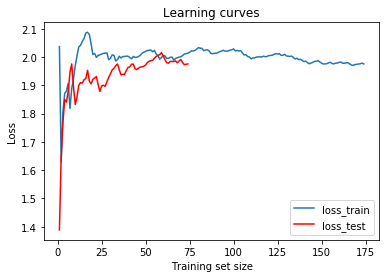

In [32]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, best_clf)

Ponovno iscrtavanje skupa podataka pred testiranje:


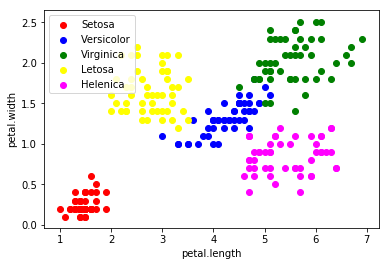

In [29]:
print('Ponovno iscrtavanje skupa podataka pred testiranje:')

colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)

plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [30]:
x1 = np.array([1, 0.5, 0.4]) # Setosa
x2 = np.array([1, 4.2, 1.2]) # Versicolor
x3 = np.array([1, 5.5, 2]) # Virginca
x4 = np.array([1, 2.9, 1.9]) # Letosa
x5 = np.array([1, 5.2, 0.8]) # Helenica

In [31]:
y_predict1 = best_clf.predict(x1)
y_predict2 = best_clf.predict(x2)
y_predict3 = best_clf.predict(x3)
y_predict4 = best_clf.predict(x4)
y_predict5 = best_clf.predict(x5)

print('~ TESTIRANJE KLASIFIKATORA ~')

print('Test 1:')
nc.Classifier.prediction_info(y_predict1, class_to_name_dict)
print()

print('Test 2:')
nc.Classifier.prediction_info(y_predict2, class_to_name_dict)
print()

print('Test 3:')
nc.Classifier.prediction_info(y_predict3, class_to_name_dict)
print()

print('Test 4:')
nc.Classifier.prediction_info(y_predict4, class_to_name_dict)
print()

print('Test 5:')
nc.Classifier.prediction_info(y_predict5, class_to_name_dict)
print() 

~ TESTIRANJE KLASIFIKATORA ~
Test 1:
Prediction vector: [0.58201693 0.15158327 0.10840631 0.22438766 0.08927302]
Max prediction value: 0.5820169268832308 (at position 0)
Class: Setosa

Test 2:
Prediction vector: [0.15208389 0.21980385 0.21524199 0.19541927 0.21918018]
Max prediction value: 0.21980385137739256 (at position 1)
Class: Versicolor

Test 3:
Prediction vector: [0.09278202 0.23479706 0.27171899 0.23010287 0.190905  ]
Max prediction value: 0.27171898889552765 (at position 2)
Class: Virginica

Test 4:
Prediction vector: [0.15152387 0.20258419 0.23344851 0.28144956 0.11158312]
Max prediction value: 0.2814495648435392 (at position 3)
Class: Letosa

Test 5:
Prediction vector: [0.15674165 0.23147265 0.19842992 0.14594051 0.33603065]
Max prediction value: 0.33603064810116684 (at position 4)
Class: Helenica

